In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as ss
from matplotlib import style
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)
import pandas as pd

In [3]:
df.head(2)

,lib,hiv,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11,Col_12,Col_13,Col_14,rpkm,Col_15,Col_16,Col_17
0,A37700,Positive,ENSG00000010610,merged_ENSG00000010610,12,6896024,6929974,+,4583,29368,4904.48,367836,120.88,9066,80.261,11.1014,4.9655,CD4,protein_coding,CD4_molecule_[Source:HGNC_Symbol;Acc:1678]
1,A37701,Negative,ENSG00000010610,merged_ENSG00000010610,12,6896024,6929974,+,4583,29368,12827.16,962037,376.49,28237,209.914,29.1677,13.2054,CD4,protein_coding,CD4_molecule_[Source:HGNC_Symbol;Acc:1678]


Positive
Negative


MannwhitneyuResult(statistic=595.0, pvalue=0.012026822822777727)

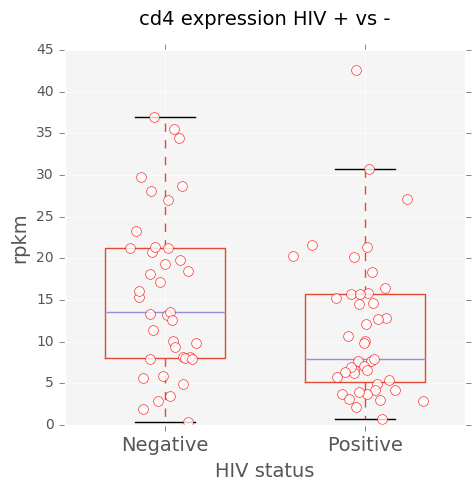

In [2]:
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/cxcr4_expression.txt', sep='\t')
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/ccr5_expression.txt', sep='\t')
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/cd4_expression.txt', sep='\t')
df.head()

df.groupby(df['hiv'])['rpkm'].describe()

fig = plt.figure()
group_col = 'hiv'
value_col = 'rpkm'
ax = df.boxplot(column=value_col, by=group_col, showfliers=False, widths=(0.6,0.6), figsize=(5,5))
plt.title('') # this removes the column as subtitle of the plot
fig =ax.get_figure()
# fig.suptitle('')

# overlay actuall data points
categories = df[group_col].unique().tolist()
for category in categories:
    y = df[value_col][df[group_col]==category]
#     i = categories.index(category) + 1
    print category
    if category == 'Positive':
        i = 2
    elif category == 'Negative':
        i = 1
    # add jitter and specify maker facecolor and edgecolor
    x = np.random.normal(i, 0.1, size=len(y))
    plt.plot(x, y, 'o', markerfacecolor='white',markeredgecolor='red', markersize=7, alpha=0.8)

# ax.set_ylim(0,0.1)
ax.set_axis_bgcolor('whitesmoke') #specify plot backgroup color
ax.tick_params(axis='x', labelsize=14) #specify x tick label size
plt.xlabel("HIV status", fontsize=14) 
plt.ylabel('rpkm', fontsize=14)
plt.suptitle('cd4 expression HIV + vs -', fontsize=14)  # get rid of the automatically generated title

# increase resolution
# plt.savefig('mutation_load_and_HIV_status.png', dpi=200)

# statistical test 
Negative = df[df['hiv']=='Negative']
Positive = df[df['hiv']=='Positive']
# tie corrected Mann Whitney U test,
ss.mannwhitneyu(Negative['rpkm'], Positive['rpkm'], use_continuity=True, alternative=None)
# ss.mannwhitneyu(Negative['log_RPM'], Positive['log_RPM'], use_continuity=True, alternative=None)

In [338]:
# use dan and rna raw counts to see if the microbial load differ between HIV positive and negative
df_rna = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/82_patients/bbt_raw_counts.txt', sep='\t', index_col='patient')
df_rna.head(2)

,TN,Burkholderia,Campylobacter,Chlamydia,Clostridium,Escherichia_coli,Bacteriodes,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,...,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,phiX,Polyomaviruses,Rotaviruses,Sphingomonas,multiMatch,noMatch,total
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,diseased_1,1521,270,0,0,1276,28,4192,0,1358,...,33698,0,3145,7,15,0,5,6805,3231898,8500929
HTMCP-03-06-02002,diseased_2,19,464,0,1,2655,64,4462,0,1,...,0,0,3085,24,24,0,7,8201,3741268,10141960


In [339]:
df_rna = df_rna.drop(['TN', 'vectors', 'phiX', 'multiMatch', 'noMatch'], axis=1)
df_rna.head(2)

,Burkholderia,Campylobacter,Chlamydia,Clostridium,Escherichia_coli,Bacteriodes,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella,...,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas,total
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,1521,270,0,0,1276,28,4192,0,1358,148,...,0,0,0,33698,0,3145,15,0,5,8500929
HTMCP-03-06-02002,19,464,0,1,2655,64,4462,0,1,423,...,0,0,0,0,0,3085,24,0,7,10141960


In [329]:
col_list= list(df_rna)
col_list.remove('total')
# col_list

In [348]:
# get RPM for microbe counts
df_rna['microbes'] = df_rna[col_list].sum(axis=1)*1000000/df_rna['total']
# df_rna.columns
df_rna.head()

,Burkholderia,Campylobacter,Chlamydia,Clostridium,Escherichia_coli,Bacteriodes,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella,...,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas,total,microbes
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,1521,270,0,0,1276,28,4192,0,1358,148,...,0,0,33698,0,3145,15,0,5,8500929,618621.800041
HTMCP-03-06-02002,19,464,0,1,2655,64,4462,0,1,423,...,0,0,0,0,3085,24,0,7,10141960,630000.907122
HTMCP-03-06-02003,22,311,0,101,1636,222,3723,2,11,238,...,0,0,12921,0,1926,14,0,9,8176449,608350.519890
HTMCP-03-06-02006,10,654,0,41,1723,266,3627,0,4,188,...,0,0,1,0,2202,11,0,8,8463835,620951.377242
HTMCP-03-06-02007,19,1237,0,47,3244,152,6660,64,7,332,...,0,0,1,0,4243,28,0,22,10879606,633713.389989


In [349]:
# get full list of patients
df_all_patients = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/num_mutations.csv',
                             sep='\t', index_col='patient')

In [350]:
df_all_patients.head(3)

,hiv,mutations
patient,,
HTMCP-03-06-02001,Positive,247
HTMCP-03-06-02002,Negative,180
HTMCP-03-06-02003,Positive,86


In [351]:
micro_merged = pd.merge(df_rna, df_all_patients,left_index=True, right_index=True, how='outer')
micro_merged.head(2)

,Burkholderia,Campylobacter,Chlamydia,Clostridium,Escherichia_coli,Bacteriodes,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella,...,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas,total,microbes,hiv,mutations
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,1521,270,0,0,1276,28,4192,0,1358,148,...,33698,0,3145,15,0,5,8500929,618621.800041,Positive,247
HTMCP-03-06-02002,19,464,0,1,2655,64,4462,0,1,423,...,0,0,3085,24,0,7,10141960,630000.907122,Negative,180


In [354]:
# statistical test 
Negative = micro_merged[(micro_merged['hiv']=='Negative')]
Positive = micro_merged[micro_merged['hiv']=='Positive']
Negative.head()

,Burkholderia,Campylobacter,Chlamydia,Clostridium,Escherichia_coli,Bacteriodes,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella,...,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas,total,microbes,hiv,mutations
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02002,19,464,0,1,2655,64,4462,0,1,423,...,0,0,3085,24,0,7,10141960,630000.907122,Negative,180
HTMCP-03-06-02006,10,654,0,41,1723,266,3627,0,4,188,...,1,0,2202,11,0,8,8463835,620951.377242,Negative,207
HTMCP-03-06-02007,19,1237,0,47,3244,152,6660,64,7,332,...,1,0,4243,28,0,22,10879606,633713.389989,Negative,8568
HTMCP-03-06-02008,22,637,0,14,2268,651,4742,496,12,274,...,18497,0,2880,23,0,15,9610241,574267.076133,Negative,91
HTMCP-03-06-02012,25,459,0,0,2166,59,3805,0,1,295,...,252,0,2618,30,0,15,10571672,592576.179057,Negative,365


In [355]:
Positive.head()

,Burkholderia,Campylobacter,Chlamydia,Clostridium,Escherichia_coli,Bacteriodes,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella,...,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas,total,microbes,hiv,mutations
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,1521,270,0,0,1276,28,4192,0,1358,148,...,33698,0,3145,15,0,5,8500929,618621.800041,Positive,247
HTMCP-03-06-02003,22,311,0,101,1636,222,3723,2,11,238,...,12921,0,1926,14,0,9,8176449,608350.519890,Positive,86
HTMCP-03-06-02020,13,1183,0,3,2174,67,4736,0,1,184,...,3,0,3210,6,0,11,10134000,658450.858496,Positive,170
HTMCP-03-06-02054,11,1042,0,82,2037,435,4513,1,2,162,...,2,0,2985,7,0,8,7786474,648264.927103,Positive,178
HTMCP-03-06-02057,16,1351,1,94,2588,114,9485,28,6,162,...,2,0,4149,14,0,15,7388190,583647.280322,Positive,76


In [357]:
# tie corrected Mann Whitney U test,
# ss.mannwhitneyu(Negative['total_mutation'], Positive['total_mutation'], use_continuity=True, alternative=None)
ss.mannwhitneyu(Negative['microbes'], Positive['microbes'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=670.0, pvalue=0.059392789042685072)

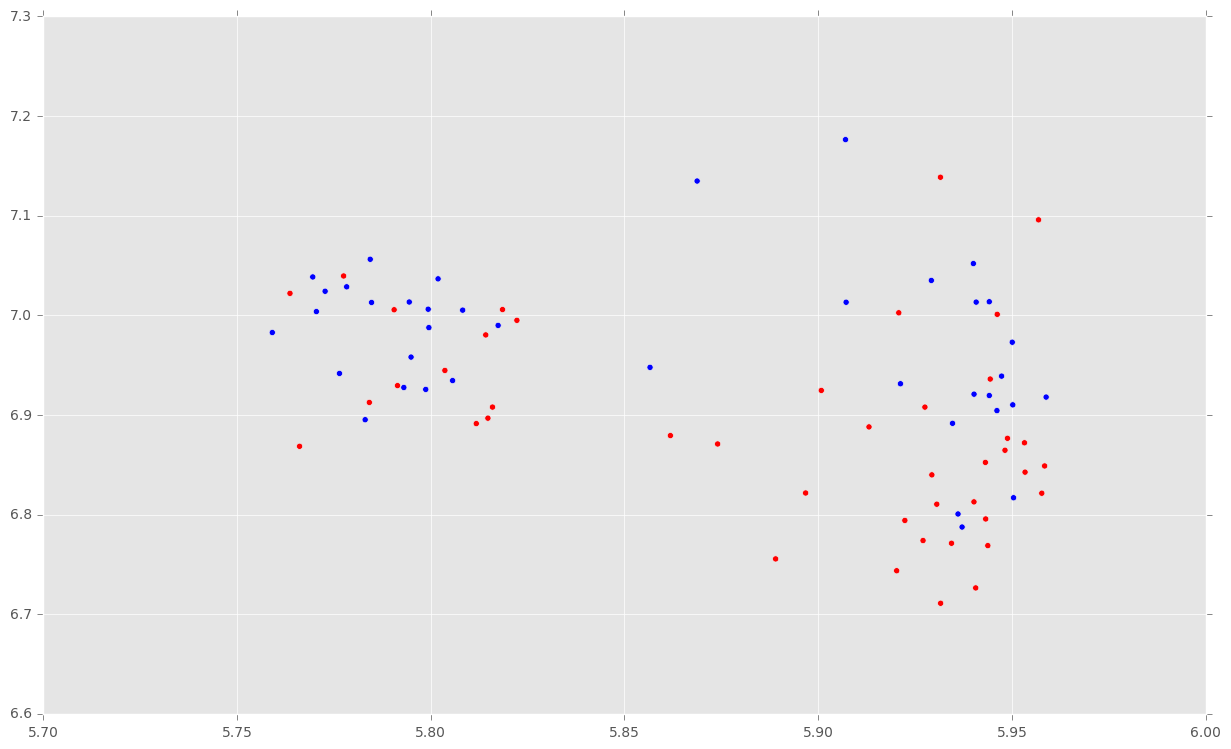

In [358]:

micro_merged['log_RPM']= np.log10(micro_merged['microbes']+1)
micro_merged['log_mutations'] =np.log10(micro_merged['total']+1)
# micro_merged['log_mutations'] =np.log10(micro_merged['mutations']+1)

colors = ['red' if i=="Positive" else 'blue' for i in micro_merged['hiv']]
fig = plt.figure()
ax = plt.subplot(111)
# plt.scatter(micro_merged['genome_load'], micro_merged['total_mutation'], c=colors, alpha=1)
plt.scatter(micro_merged['log_RPM'], micro_merged['log_mutations'], c=colors, alpha=1)
# ax.set_ylim(0,500)
# micro_merged.plot('genome_load', 'total_mutation', kind='scatter')

# figure out number of indels

Positive
Negative


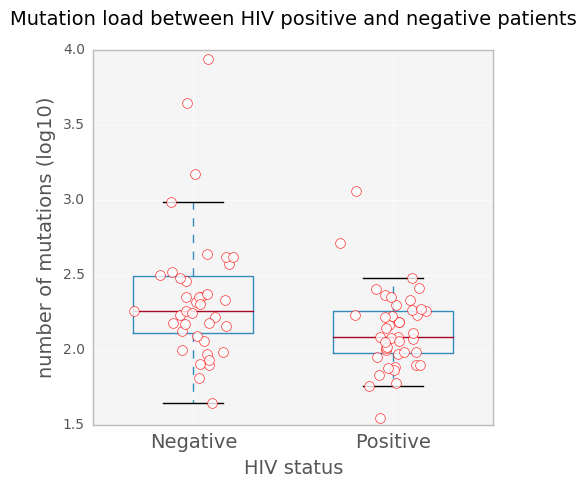

In [489]:
df_indels = pd.read_csv('')
# df_indels = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/high_moderate_INDEL_summary_with_normal_strelka_calls_only.txt', sep='\t')
with open('number_of_strelka_indels.txt', 'wb') as fh:
    counts = df_indels['patient_ID'].value_counts()
#     print counts
    for i in range(len(counts)):
        print >>fh, counts.index[i], counts[i]
#         print >>fh, i
# for name, group in df_indels.groupby('patient_ID'):
#     print name, group['gene'].value_counts()

# get number of snvs
df_all_patients = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/num_mutations.csv',
                             sep='\t')

df_all_patients.head()

# get number of indels
df_indel_counts = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/number_of_strelka_indels_new.txt', 
                              sep='\t')

df_indel_counts.head()


# merge snv and indels counts
merged = pd.merge(df_all_patients, df_indel_counts, how='outer')

merged.head()

merged.fillna(0, inplace=True)
merged['total_mutation']= merged.sum(axis=1)
merged.head()
merged['log_mutations'] = np.log10(merged['total_mutation'])
merged.head()

# df.hiv.unique()

df = merged

# boxplot by groups for mutations
# ax = df.boxplot(column='log_mutations', by='hiv', grid=False)
# specify box width with a tuble depending on the number of categories
fig = plt.figure()
group_col = 'hiv'
value_col = 'log_mutations'
ax = df.boxplot(column=value_col, by=group_col, showfliers=False, widths=(0.6,0.6), figsize=(5,5))
plt.title('') # this removes the column as subtitle of the plot
fig =ax.get_figure()
# fig.suptitle('')

# overlay actuall data points
categories = df[group_col].unique().tolist()
for category in categories:
    y = df[value_col][df[group_col]==category]
#     i = categories.index(category) + 1
    print category
    if category == 'Positive':
        i = 2
    elif category == 'Negative':
        i = 1
    # add jitter and specify maker facecolor and edgecolor
    x = np.random.normal(i, 0.1, size=len(y))
    plt.plot(x, y, 'o', markerfacecolor='white',markeredgecolor='red', markersize=7, alpha=0.8)

# ax.set_ylim(0,0.1)
ax.set_axis_bgcolor('whitesmoke') #specify plot backgroup color
ax.tick_params(axis='x', labelsize=14) #specify x tick label size
plt.xlabel("HIV status", fontsize=14) 
plt.ylabel('number of mutations (log10)', fontsize=14)
plt.suptitle('Mutation load between HIV positive and negative patients', fontsize=14)  # get rid of the automatically generated title

# increase resolution
plt.savefig('mutation_load_and_HIV_status.png', dpi=200)
# plt.savefig('lele.png', dpi=200)

In [481]:
!pwd


/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients


In [379]:
# statistical test 
Negative = merged[(merged['hiv']=='Negative')]
Positive = merged[merged['hiv']=='Positive']
# tie corrected Mann Whitney U test,
ss.mannwhitneyu(Negative['total_mutation'], Positive['total_mutation'], use_continuity=True, alternative=None)
# ss.mannwhitneyu(Negative['log_RPM'], Positive['log_RPM'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=546.5, pvalue=0.0033961221063484562)

In [381]:
merged.hiv.unique()

array(['Positive', 'Negative'], dtype=object)

In [287]:
# read in genome microbial load
# G_load = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/microbial_load_genome.txt',
#                     sep='\t')

G_load = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/microbial_load_transcriptome.txt',
                    sep='\t')


In [ ]:
G_load.head()
# merge microbial load and mutation load
merged = pd.merge(merged, G_load, how='outer')
merged['log_RPM']= np.log10(merged['genome_load']*10000+1)
merged['log_mutations'] =np.log10(merged['total_mutation']+1)
# merged['log_mutations'] =np.log10(merged['mutations']+1)

colors = ['red' if i=="Positive" else 'blue' for i in merged['hiv']]
fig = plt.figure()
ax = plt.subplot(111)
# plt.scatter(merged['genome_load'], merged['total_mutation'], c=colors, alpha=1)
plt.scatter(merged['log_RPM'], merged['log_mutations'], c=colors, alpha=1)
# ax.set_ylim(0,500)
# merged.plot('genome_load', 'total_mutation', kind='scatter')

In [237]:
# merged

In [290]:
# statistical test 
Negative = merged[(merged['HIV_status']=='Negative')]
Positive = merged[merged['HIV_status']=='Positive']
# tie corrected Mann Whitney U test,
ss.mannwhitneyu(Negative['total_mutation'], Positive['total_mutation'], use_continuity=True, alternative=None)
# ss.mannwhitneyu(Negative['log_RPM'], Positive['log_RPM'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=578.0, pvalue=0.3792646742164163)

In [230]:
Negative['mutations'].head()

1     180
3     207
4    8568
5      91
6     365
Name: mutations, dtype: int64

In [164]:
df_indels['patient_ID'].value_counts().index[0]

'HTMCP-03-06-02007_malignant'

In [101]:
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/num_mutations.csv', sep='\t')
# df['point'] = np.random.rand(len(df))
# df.head()
# colors = [1 if i=="Positive" else 2 for i in df['hiv']]
# fig = plt.figure()
# ax = plt.subplot(111)
# plt.scatter(df['point'], df['mutations'], c=colors, alpha=1)
# ax.set_ylim(0,500)
# # t test 
# Negative = df[df.hiv=='Negative']
# Positive = df[df.hiv=='Positive']
# ttest_ind(Negative['mutations'], Positive['mutations'])

In [129]:
df

,mutations,HIV_status
patient,,
HTMCP-03-06-02001,267,Positive
HTMCP-03-06-02002,199,Negative
HTMCP-03-06-02003,91,Positive
HTMCP-03-06-02006,223,Negative
HTMCP-03-06-02007,16370,Negative
HTMCP-03-06-02008,100,Negative
HTMCP-03-06-02012,389,Negative
HTMCP-03-06-02013,108,Negative
HTMCP-03-06-02020,186,Positive


MannwhitneyuResult(statistic=547.5, pvalue=0.0034941628968315664)

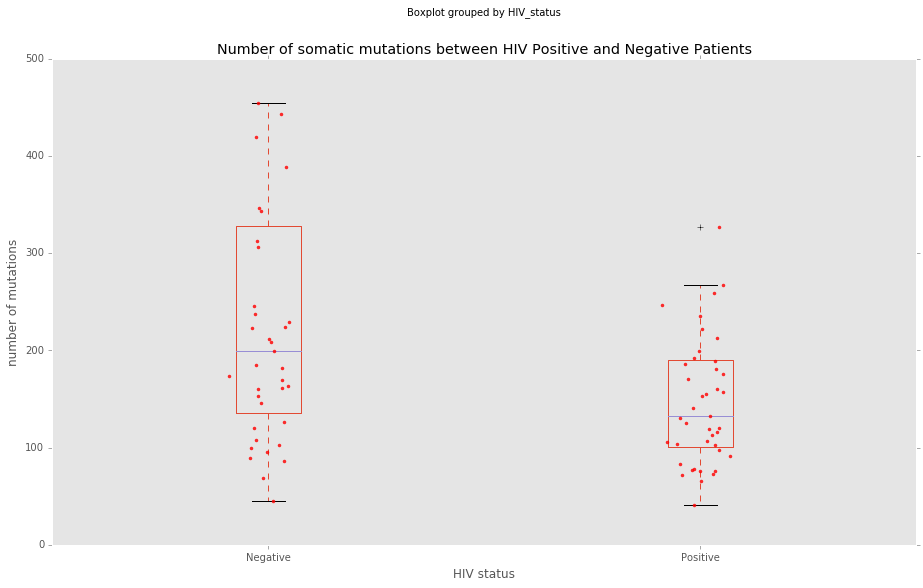

In [174]:

df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/high_moderate_SNV_summary_with_normal_82_patients.filtered.somatic.txt', sep='\t')
df['point'] = np.random.rand(len(df)) 
groups = df.groupby('patient_ID')

from __future__ import print_function
with open("test.csv", 'w') as f:
    f.write("patient\tmutations\n")
    for name, group in groups:
        print("\t".join([name.replace('_malignant', '').replace('_Malignant', ''), str(len(group['gene']))]), file=f)


df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/test.csv', 
                 sep='\t')

df.set_index('patient', inplace=True)
df_hiv = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/HIV_status.txt', 
                 sep='\t')
df_hiv.set_index('patient', inplace=True)

df = df.join(df_hiv, how='outer')
df.fillna(0, inplace=True)

df.head()



# boxplot by groups
fig = plt.figure()
ax = df.boxplot(column='mutations', by='HIV_status', grid=False)
# overlay actuall data points
for i in ['Positive', 'Negative']:
    y = df['mutations'][df['HIV_status']==i]
    if i=='Positive':
        i=2
    elif i=='Negative':
        i=1
    # add jitter
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.8)



ax.set_ylim(0,500)
plt.xlabel("HIV status")
plt.ylabel('number of mutations')
plt.title('Number of somatic mutations between HIV Positive and Negative Patients')
plt.savefig('somatic_mutations_and_HIV_status.png')


# df.groupby('HIV_status').plot()

# statistic analysis to see if the number of somatic mutations differs between hiv + -
# t test, not a good choice since the numbers are skewed, not normally distributed

# weird, & can not be replaced by and

# Negative = df[(df['HIV_status']=='Negative') & (df['mutations']<2000)]
Negative = df[(df['HIV_status']=='Negative')]
Positive = df[df['HIV_status']=='Positive']
# ttest_ind(Negative['mutations'], Positive['mutations'])


# values_per_group = [col for col_name, col in df.groupby('HIV_status')['mutations']]
# ss.ranksums(*values_per_group)

# Wilcoxon ranksum does not handle ties
# ss.ranksums(Negative['mutations'], Positive['mutations'])

# tie corrected Mann Whitney U test,
ss.mannwhitneyu(Negative['mutations'], Positive['mutations'], use_continuity=True, alternative=None)

In [175]:
Negative.describe()

,mutations
count,39.000000
mean,832.410256
std,2734.821246
min,45.000000
25%,136.000000
50%,199.000000
75%,328.000000
max,16370.000000


In [176]:
Positive.describe()

,mutations
count,43.00000
mean,181.72093
std,197.52219
min,41.00000
25%,100.50000
50%,132.00000
75%,190.50000
max,1305.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0788ece6d0>]], dtype=object)

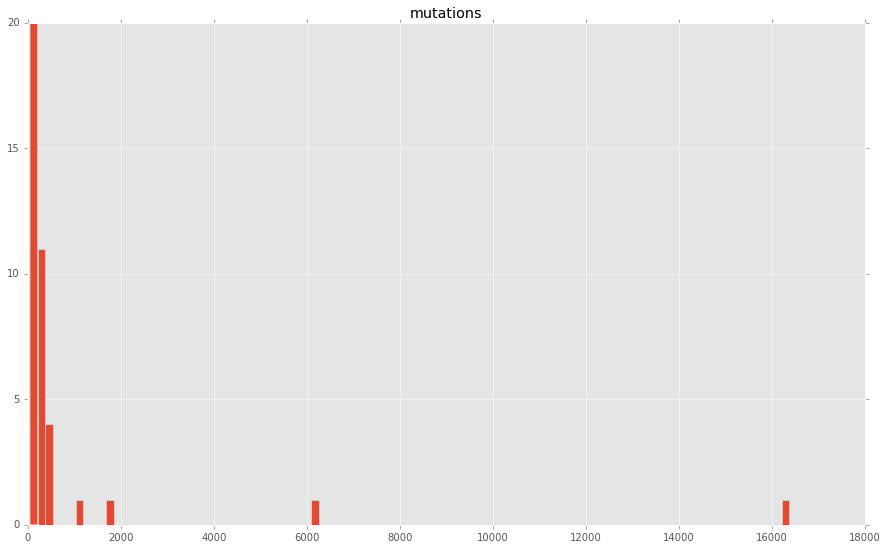

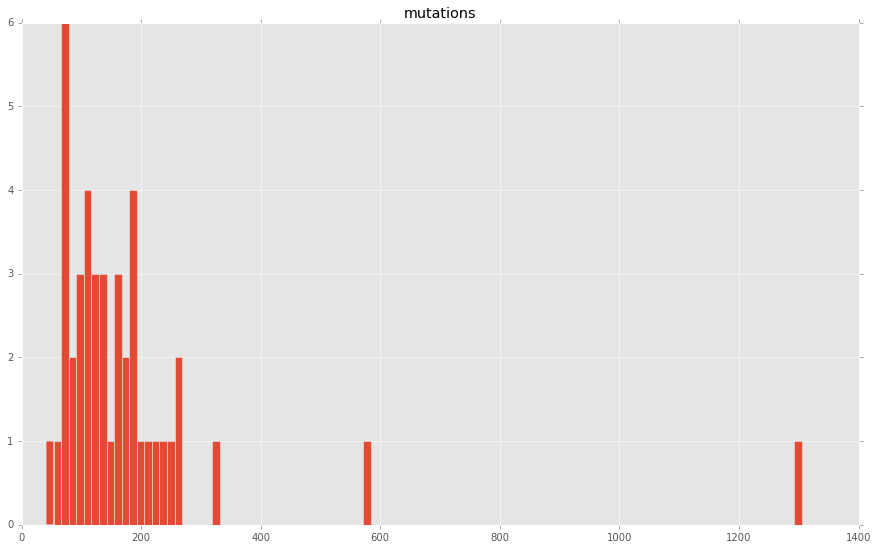

In [144]:
# df['mutations'].hist(bins=1000)
Negative.hist(bins=100)
Positive.hist(bins=100)

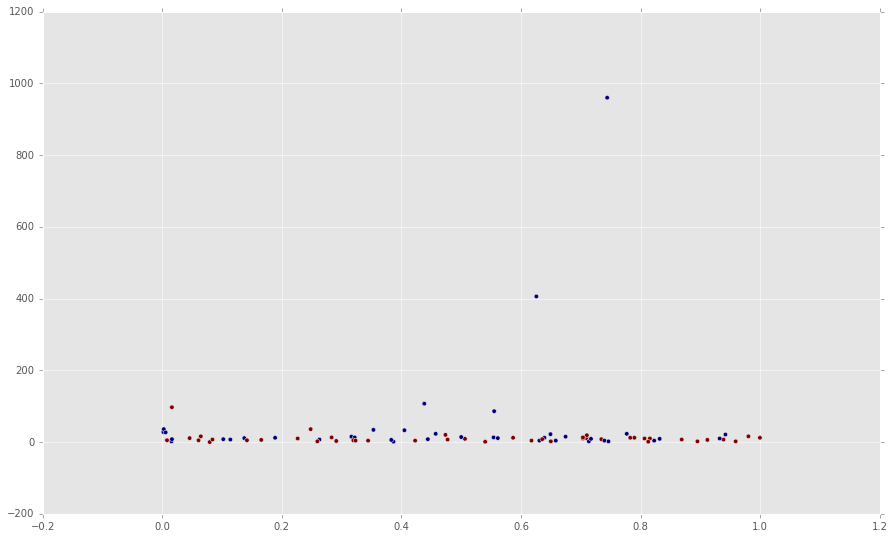

In [111]:
df['point'] = np.random.rand(len(df)) 
df.head()
colors = [1 if i=="Negative" else 2 for i in df['HIV_status']]
colors
plt.scatter(df['point'], df['mutations'], c=colors, alpha=1)


In [189]:
colors = [1 if i=="Positive" else 2 for i in df['hiv']]



colors

plt.scatter(df['point'], df['mutations'], c=colors, alpha=1)

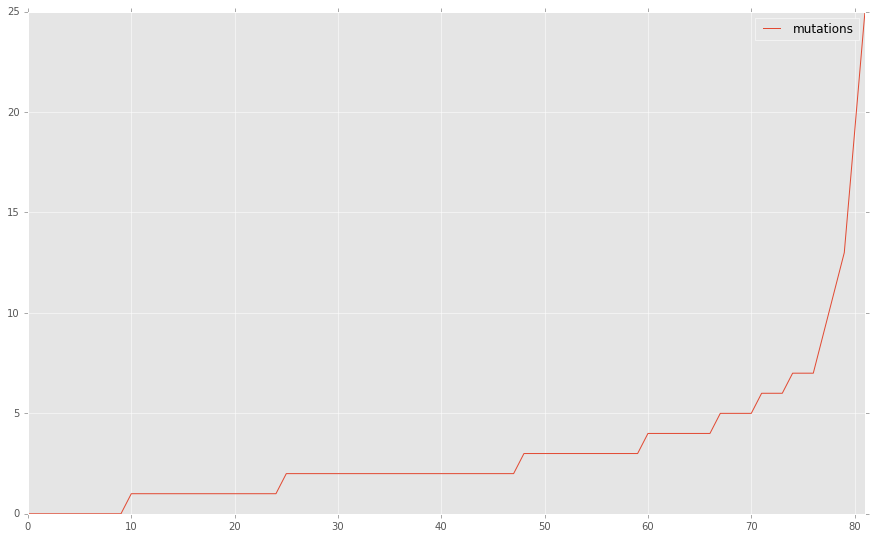

In [135]:
df.plot()
# data are not normally distributed ?

In [114]:
df.head()

,patient,mutations,histology,hiv
0,HTMCP-03-06-02046,0,Squamous,Negative
1,HTMCP-03-06-02057,0,Squamous,Positive
2,HTMCP-03-06-02089,0,Squamous,Positive
3,HTMCP-03-06-02099,0,Adeno,Negative
4,HTMCP-03-06-02109,0,Squamous,Positive


In [118]:
df.groupby('hiv').describe()

mutations
hiv                      
Negative count  39.000000
         mean    4.461538
         std     4.860399
         min     0.000000
         25%     2.000000
         50%     3.000000
         75%     5.500000
         max    25.000000
Positive count  43.000000
         mean    2.023256
         std     2.121190
         min     0.000000
         25%     1.000000
         50%     2.000000
         75%     2.500000
         max    13.000000

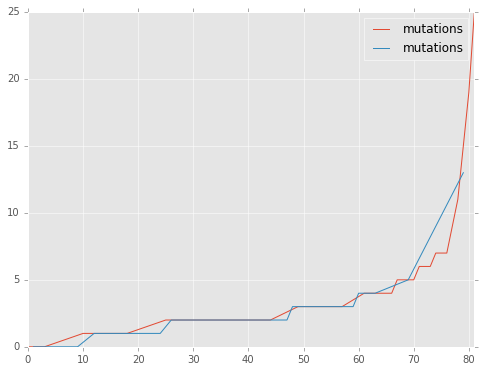

In [129]:
grouped = df.groupby('hiv')
fig, ax = plt.subplots(figsize=(8,6))
bp = grouped.plot(ax=ax)
# grouped.boxplot()
# plt.savefig('hiv_num_mutations_boxplot.png')

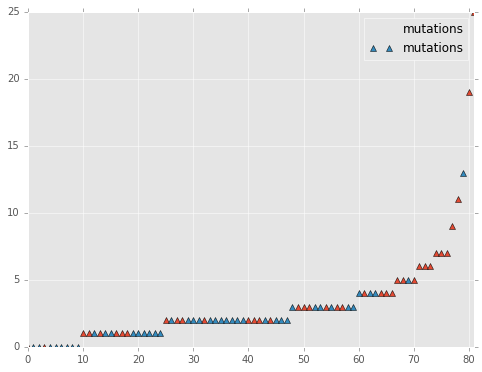

In [134]:
markers = ['^', 'o', 'v', 's', 'd']
fig, ax = plt.subplots(figsize=(8,6))
bp = grouped.plot(style=markers, ax=ax)


In [117]:
# t test 
Negative = df[df.hiv=='Negative']
Positive = df[df.hiv=='Positive']
ttest_ind(Negative['mutations'], Positive['mutations'])

Ttest_indResult(statistic=2.9918512495674721, pvalue=0.0036857670786786226)

In [119]:
aa = pd.DataFrame([Negative.mutations.tolist(), Positive.mutations.tolist()])

/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7faab6a4bad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7faab6a5aa10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faab69e7d10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7faab69e76d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7faab6a4bcd0>,
  <matplotlib.lines.Line2D at 0x7faab69f2fd0>]}

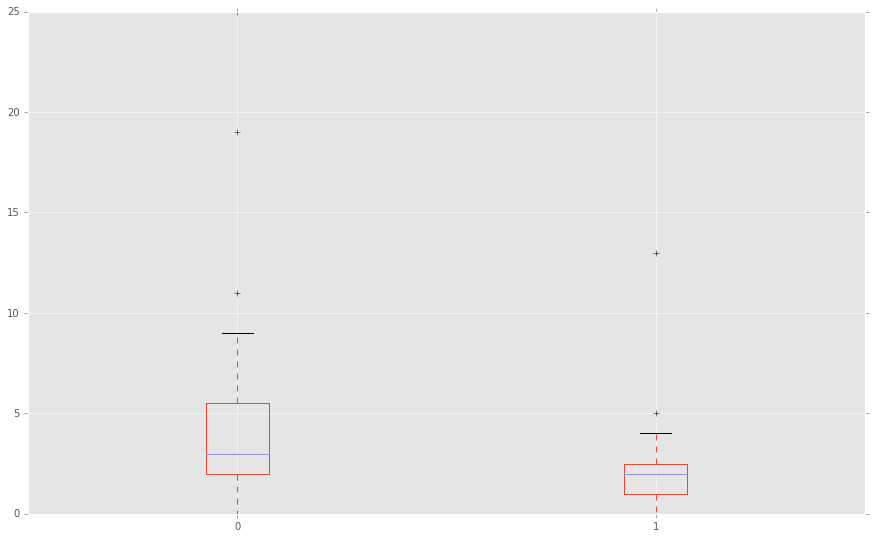

In [92]:
aa.T.boxplot()

In [34]:
df_joined.head()

,Positive_mutations,Positive_histology,Negative_mutations,Negative_histology
patient,,,,
HTMCP-03-06-02001,4.0,Squamous,NaN,NaN
HTMCP-03-06-02002,NaN,NaN,5.0,Squamous
HTMCP-03-06-02003,3.0,Squamous,NaN,NaN
HTMCP-03-06-02006,NaN,NaN,1.0,Squamous
HTMCP-03-06-02007,NaN,NaN,25.0,Adeno


/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


AttributeError: 'dict' object has no attribute 'set_ylim'

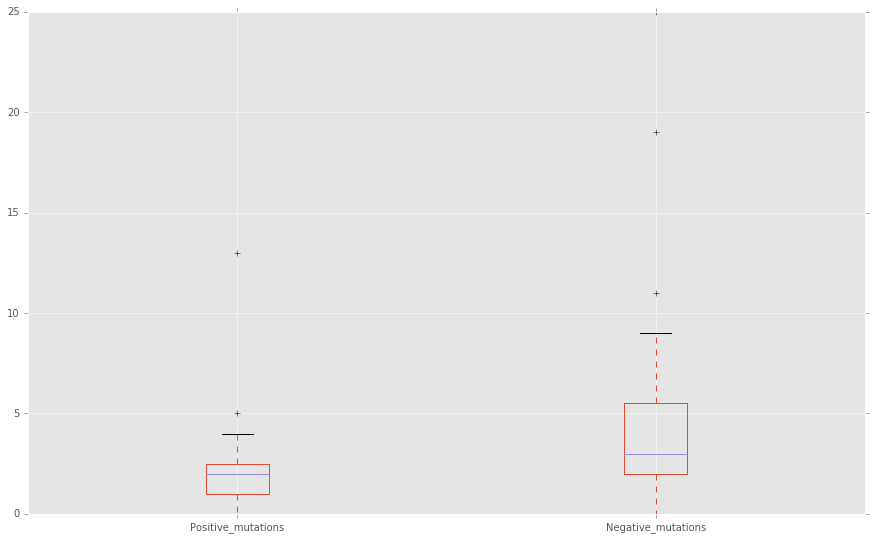

In [52]:
markers = ['^', 'o', 'v', 's', 'd']
colors = df['hiv']

# ax = df_joined.plot(style=markers)
# ax.set_ylim(-1, 30)
ax = df_joined.boxplot()


In [ ]:
# below are code from tutorial 1

                 Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2010-01-04  68.720001  69.260002  68.190002  69.150002  27809100  57.203028
2010-01-05  69.190002  69.449997  68.800003  69.419998  30174700  57.426378
2010-01-06  69.449997  70.599998  69.339996  70.019997  35044700  57.922715
2010-01-07  69.900002  70.059998  69.419998  69.800003  27192100  57.740730
2010-01-08  69.690002  69.750000  69.220001  69.519997  24891800  57.509100


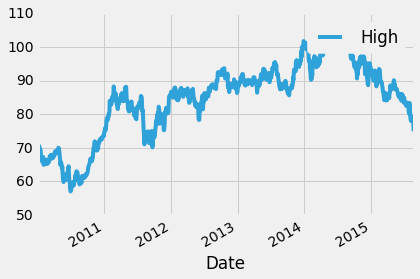

In [3]:
import pandas as pd
import datetime
import pandas.io.data as web


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 8, 22)
df = web.DataReader("XOM", "yahoo", start, end)
print(df.head())
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
df['High'].plot()
plt.legend()
plt.show()

In [ ]:
# below are tutorial 2

In [26]:
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}
import pandas as pd

web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

df = pd.DataFrame(web_stats)
print(df.head())
print(df.tail(2))
# df = df.set_index('Day', inplace=True) wont work, set_index return nothing
df.set_index('Day', inplace=True)
import matplotlib.pyplot as plt
from matplotlib import style


   Bounce Rate  Day  Visitors
0           65    1        43
1           67    2        34
2           78    3        65
3           65    4        56
4           45    5        29
   Bounce Rate  Day  Visitors
4           45    5        29
5           52    6        76


In [28]:
print(df.head())

     Bounce Rate  Visitors
Day                       
1             65        43
2             67        34
3             78        65
4             65        56
5             45        29


Day
1    43
2    34
3    65
4    56
5    29
6    76
Name: Visitors, dtype: int64
Day
1    43
2    34
3    65
4    56
5    29
6    76
Name: Visitors, dtype: int64
     Visitors  Bounce Rate
Day                       
1          43           65
2          34           67
3          65           78
4          56           65
5          29           45
6          76           52


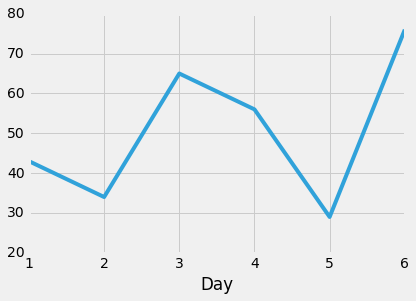

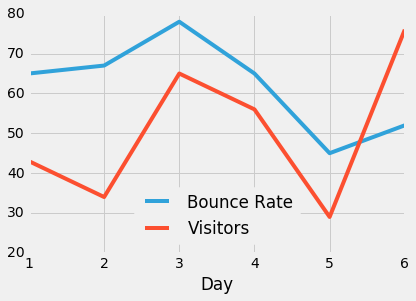

In [32]:
style.use('fivethirtyeight')
print(df['Visitors'])
print(df.Visitors)
print(df[['Visitors','Bounce Rate']])
df['Visitors'].plot()
plt.show()
df.plot()
plt.show()

In [46]:
import pandas as pd

df = pd.read_csv('ZILL-Z91655_3B.csv')
print(df.head())

         Date     Value
0  2016-06-30  481100.0
1  2016-05-31  493800.0
2  2015-12-31  514000.0
3  2015-10-31  510700.0


In [47]:
df.set_index('Date', inplace = True)

In [48]:
df.to_csv('newcsv2.csv')
!cat newcsv2.csv

Date,Value
2016-06-30,481100.0
2016-05-31,493800.0
2015-12-31,514000.0
2015-10-31,510700.0


In [42]:
# df['Value'].to_csv('newcsv2.csv')
# !cat newcsv2.csv

2016-06-30,481100.0
2016-05-31,493800.0
2015-12-31,514000.0
2015-10-31,510700.0


In [43]:
# df = pd.read_csv('newcsv2.csv')
# print(df.head())

   2016-06-30  481100.0
0  2016-05-31  493800.0
1  2015-12-31  514000.0
2  2015-10-31  510700.0


In [50]:
df = pd.read_csv('newcsv2.csv', index_col=0)
print(df.head())

               Value
Date                
2016-06-30  481100.0
2016-05-31  493800.0
2015-12-31  514000.0
2015-10-31  510700.0


In [52]:
df.columns = ['House_Prices']
print(df.head())
df.to_csv('newcsv3.csv')

            House_Prices
Date                    
2016-06-30      481100.0
2016-05-31      493800.0
2015-12-31      514000.0
2015-10-31      510700.0


In [54]:
!cat newcsv3.csv
df.to_csv('newcsv4.csv', header=False)

Date,House_Prices
2016-06-30,481100.0
2016-05-31,493800.0
2015-12-31,514000.0
2015-10-31,510700.0


In [55]:
df = pd.read_csv('newcsv4.csv', names = ['Date','House_Price'], index_col=0)
print(df.head())

            House_Price
Date                   
2016-06-30     481100.0
2016-05-31     493800.0
2015-12-31     514000.0
2015-10-31     510700.0


In [56]:
df.to_html('example.html')

In [58]:
!cat example.html

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>House_Price</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2016-06-30</th>
      <td>481100.0</td>
    </tr>
    <tr>
      <th>2016-05-31</th>
      <td>493800.0</td>
    </tr>
    <tr>
      <th>2015-12-31</th>
      <td>514000.0</td>
    </tr>
    <tr>
      <th>2015-10-31</th>
      <td>510700.0</td>
    </tr>
  </tbody>
</table>

In [63]:
df = pd.read_csv('newcsv4.csv', names = ['Date','House_Price'])
print(df.head())

df.rename(columns={'House_Price':'Prices'}, inplace=True)
print(df.head())

         Date  House_Price
0  2016-06-30     481100.0
1  2016-05-31     493800.0
2  2015-12-31     514000.0
3  2015-10-31     510700.0
         Date    Prices
0  2016-06-30  481100.0
1  2016-05-31  493800.0
2  2015-12-31  514000.0
3  2015-10-31  510700.0


In [64]:
import Quandl

ImportError: No module named Quandl

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Mick_Bhatia/variants/high_moderate_SNV_summary_with_normal.filtered.somatic.txt', 
                 sep='\t')
# subset data based on a column value 
df_4BN =df.loc[(df.patient_ID=='AML-16626_Xengraft-16-4BN'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]
df_4BN.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)
df_4BN = df_4BN.rename(columns = {'t_DNA_AF':'4BN'})
print(df_4BN.head())

# subset data based on a column value 
df_Leukemic =df.loc[(df.patient_ID=='AML-16626_Leukemic-blast'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]
df_Leukemic.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)
df_Leukemic = df_Leukemic.rename(columns = {'t_DNA_AF':'Leukemic'})
print(df_Leukemic.head())

# subset data based on a column value 
df_2AL =df.loc[(df.patient_ID=='AML-16626_Xenograft-16-2AL'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]
df_2AL.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)
df_2AL = df_2AL.rename(columns = {'t_DNA_AF':'2AL'})
print(df_2AL.head())

# subset data based on a column value 
df_2AL =df.loc[(df.patient_ID=='AML-16626_Xenograft-16-2AL'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]
df_2AL.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)
df_2AL = df_2AL.rename(columns = {'t_DNA_AF':'2AL'})
print(df_2AL.head())

# subset data based on a column value 
df_2AL =df.loc[(df.patient_ID=='AML-16626_Xenograft-16-2AL'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]
df_2AL.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)
df_2AL = df_2AL.rename(columns = {'t_DNA_AF':'2AL'})
print(df_2AL.head())


# df1.t_DNA_AF.plot()
# plt.legend()
# plt.show()

In [ ]:
joined = df_Leukemic.join(df_2AL, how='outer')
joined = joined.join(df_4BN, how='outer')
joined = joined.sort_values(['2AL', '4BN', 'Leukemic'])
joined.plot(linestyle='-', linewidth=1)
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

In [1]:
# code for integrations stuff
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/integration/82_patients/merged_integration_results_82_patients.txt', 
                 sep='\t')
# subset data based on a column value 
# df_4BN =df.loc[(df.patient_ID=='AML-16626_Xengraft-16-4BN'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]


In [40]:
# print(df.head())
# {k: list(v) for k,v in df.groupby("patient")["virus"] if len(list(v)) >1}
# number of patient with multiple HPV strains
patient_multiple_strains = [k for k,v in df.groupby("patient")["virus"] if len(list(v)) >1]
print(len(patient_multiple_strains))
patient_1_strain = [k for k,v in df.groupby("patient")["virus"] if len(list(v)) ==1]
print(len(patient_1_strain))

46
32


In [46]:
[k for k in patient_1_strain]

['HTMCP-03-06-02001',
 'HTMCP-03-06-02002',
 'HTMCP-03-06-02003',
 'HTMCP-03-06-02013',
 'HTMCP-03-06-02036',
 'HTMCP-03-06-02037',
 'HTMCP-03-06-02040',
 'HTMCP-03-06-02042',
 'HTMCP-03-06-02057',
 'HTMCP-03-06-02061',
 'HTMCP-03-06-02074',
 'HTMCP-03-06-02099',
 'HTMCP-03-06-02113',
 'HTMCP-03-06-02125',
 'HTMCP-03-06-02139',
 'HTMCP-03-06-02144',
 'HTMCP-03-06-02148',
 'HTMCP-03-06-02150',
 'HTMCP-03-06-02151',
 'HTMCP-03-06-02152',
 'HTMCP-03-06-02155',
 'HTMCP-03-06-02194',
 'HTMCP-03-06-02196',
 'HTMCP-03-06-02203',
 'HTMCP-03-06-02204',
 'HTMCP-03-06-02209',
 'HTMCP-03-06-02210',
 'HTMCP-03-06-02214',
 'HTMCP-03-06-02215',
 'HTMCP-03-06-02216',
 'HTMCP-03-06-02235',
 'HTMCP-03-06-02242']

In [ ]:
# code Mick Bhatia pyclone results

                                                4BN
gene   chromosome position  ref_base alt_base      
RBMXL3 X          114426813 C        T         0.11
                  114426183 A        G         0.14
                  114426031 T        C         0.20
                  114426805 A        G         0.13
                  114426145 A        G         0.11
                                                 Leukemic
gene     chromosome position  ref_base alt_base          
ZNF701   19         53086240  C        A             0.10
RBMXL3   X          114426031 T        C             0.23
                    114426145 A        G             0.18
                    114425772 T        C             0.24
KRTAP2-2 17         39211139  C        A             0.16


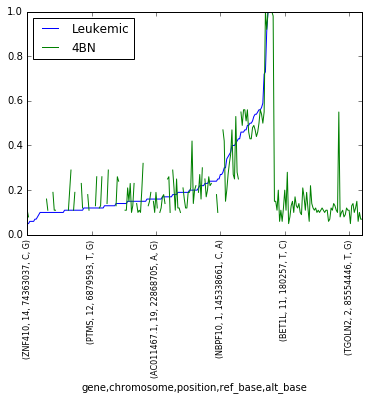

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Mick_Bhatia/pyclone/high_moderate_SNV_summary_with_normal.filtered.somatic.txt', sep='\t')
# df.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)

# subset data based on a column value 
df_4BN =df.loc[(df.patient_ID=='AML-16626_Xengraft-16-4BN'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]
df_4BN.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)
df_4BN = df_4BN.rename(columns = {'t_DNA_AF':'4BN'})
print(df_4BN.head())

# subset data based on a column value 
df_Leukemic =df.loc[(df.patient_ID=='AML-16626_Leukemic-blast'),['gene', 'chromosome', 'position', 'ref_base','alt_base', 't_DNA_AF']]
df_Leukemic.set_index(['gene', 'chromosome', 'position', 'ref_base','alt_base'], inplace=True)
df_Leukemic = df_Leukemic.rename(columns = {'t_DNA_AF':'Leukemic'})
print(df_Leukemic.head())

joined = df_Leukemic.join(df_4BN, how='outer')
joined = joined.sort_values(['Leukemic'])
joined.plot(linestyle='-', linewidth=1)
plt.xticks(rotation='vertical', fontsize=8)
plt.show()



In [50]:
print(df.head())

                                               filtered_num_patients_gene_level  \
gene   chromosome position  ref_base alt_base                                     
ZNF701 19         53086240  C        A                                        1   
RBMXL3 X          114426813 C        T                                        1   
                  114425502 T        C                                        1   
                  114426183 A        G                                        1   
                                     G                                        1   

                                               filtered_num_SNVs_gene_level  \
gene   chromosome position  ref_base alt_base                                 
ZNF701 19         53086240  C        A                                    1   
RBMXL3 X          114426813 C        T                                   12   
                  114425502 T        C                                   12   
                  11442

In [ ]:
#Cervical TCGA maf 

In [89]:
df =pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_variants/tcga_variants.tmp', sep='\t')

In [90]:
df.head()

,gene,nci_all_histology,nci_squamous,tcga_all_histology,tcga_squamous
0,PIK3CA,0.37,0.35,0.26,0.25
1,HLA-A,0.27,0.25,0.08,0.10
2,HLA-B,0.24,0.21,0.06,0.08
3,FAT1,0.18,0.14,0.07,0.08
4,LRP1B,0.18,0.16,0.08,0.08


In [76]:
df_hist = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_variants/tcga_histology.txt', sep='\t')

In [82]:
df_hist.head()

,patient,histology
0,TCGA-BI-A0VR-01A-11D-A10S-08,Squamous
1,TCGA-BI-A0VS-01A-11D-A10S-08,Squamous
2,TCGA-BI-A20A-01A-11D-A14W-08,Squamous
3,TCGA-C5-A0TN-01A-21D-A14W-08,Squamous
4,TCGA-C5-A1BE-01B-11D-A13W-08,Squamous


In [81]:
# df_hist[df_hist['histology']!='Squamous']

In [85]:
df.head()

,gene,nci_all_histology,nci_squamous,tcga_all_histology,tcga_squamous
0,PIK3CA,0.37,0.35,0.26,0.25
1,HLA-A,0.27,0.25,0.08,0.10
2,HLA-B,0.24,0.21,0.06,0.08
3,FAT1,0.18,0.14,0.07,0.08
4,LRP1B,0.18,0.16,0.08,0.08


In [80]:
merge = pd.merge(df, df_hist, left_on='Tumor_Sample_Barcode', right_on='patient')

KeyError: 'Tumor_Sample_Barcode'

In [50]:
df = merge

merge

groups = df.groupby('Hugo_Symbol')
for name, group in groups:
    print('{0}\t{1}').format(name, len(set(group['Tumor_Sample_Barcode']))/178.0)
df.head()

In [54]:
# variants in NCI HIV Cervical 82 patients

In [138]:
# SNVs
df_snvs = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/high_moderate_SNV_summary_with_normal_82_patients.filtered.somatic.txt', sep='\t')

In [139]:
df_snvs.head()

,gene,filtered_num_patients_gene_level,filtered_num_SNVs_gene_level,num_patients_gene_level,num_SNVs_gene_level,chromosome,position,ref_base,alt_base,filtered_num_patients_SNV_level,...,t_RNA_cov,t_RNA_RefC,t_RNA_AltC,t_RNA_AF,adj_t_RNA_cov,adj_t_RNA_RefC,adj_t_RNA_AltC,adj_t_RNA_AF,RNA_fisher_pvalue,RNA_tc
0,UBE2Q1,1,1,3,2,1,154530861,C,A,1,...,213,146,67,0.31,na,na,na,na,na,70
1,DUOXA1,2,2,65,9,15,45412938,C,T,1,...,203,171,32,0.16,na,na,na,na,na,70
2,DUOXA1,2,2,65,9,15,45415069,C,A,1,...,1,1,0,0.00,na,na,na,na,na,65
3,UBE2Q2,1,1,82,3,15,76171485,G,T,1,...,190,176,7,0.04,na,na,na,na,na,65
4,RNF10,3,3,8,7,12,120984215,G,T,1,...,442,265,165,0.38,na,na,na,na,na,50


In [92]:
df_snvs = df_snvs[['gene', 'patient_ID']]
df_snvs['patient_new_ID'] = df_snvs['patient_ID'].apply(lambda x: x.split('_')[0])

In [93]:
df_snvs.head()

,gene,patient_ID,patient_new_ID
0,UBE2Q1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196
1,DUOXA1,HTMCP-03-06-02012_malignant,HTMCP-03-06-02012
2,DUOXA1,HTMCP-03-06-02026_malignant,HTMCP-03-06-02026
3,UBE2Q2,HTMCP-03-06-02026_malignant,HTMCP-03-06-02026
4,RNF10,HTMCP-03-06-02007_malignant,HTMCP-03-06-02007


In [94]:
#indels strelka call only
df_indels = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/high_moderate_INDEL_summary_with_normal_strelka_calls_only.txt', sep='\t')

In [95]:
df_indels = df_indels[['gene', 'patient_ID']]
df_indels['patient_new_ID'] = df_indels['patient_ID'].apply(lambda x: x.split('_')[0])
df_indels.head()

,gene,patient_ID,patient_new_ID
0,ELF3,HTMCP-03-06-02058_malignant,HTMCP-03-06-02058
1,MT-ND4L,HTMCP-03-06-02057_malignant,HTMCP-03-06-02057
2,AGL,HTMCP-03-06-02103_malignant,HTMCP-03-06-02103
3,ZSWIM2,HTMCP-03-06-02068_malignant,HTMCP-03-06-02068
4,TSPO2,HTMCP-03-06-02007_malignant,HTMCP-03-06-02007


In [99]:
# concatenate 2 data frames df and df_indels
df = pd.concat([df_snvs, df_indels])


In [100]:
df.shape, df_indels.shape, df_snvs.shape

((38649, 3), (359, 3), (38290, 3))

In [101]:
df.head()

,gene,patient_ID,patient_new_ID
0,UBE2Q1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196
1,DUOXA1,HTMCP-03-06-02012_malignant,HTMCP-03-06-02012
2,DUOXA1,HTMCP-03-06-02026_malignant,HTMCP-03-06-02026
3,UBE2Q2,HTMCP-03-06-02026_malignant,HTMCP-03-06-02026
4,RNF10,HTMCP-03-06-02007_malignant,HTMCP-03-06-02007


In [103]:
df_hist = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/patient_histology_miRNA_prediction.csv', sep='\t')

In [104]:
df_hist = df_hist[['patient', 'HIV_status']]
df_hist.head()

,patient,HIV_status
0,HTMCP-03-06-02001,Positive
1,HTMCP-03-06-02002,Negative
2,HTMCP-03-06-02003,Positive
3,HTMCP-03-06-02006,Negative
4,HTMCP-03-06-02007,Negative


In [94]:
df_hist[df_hist['putative_Histology']!='Squamous']

,patient,putative_Histology
4,HTMCP-03-06-02007,Adeno
9,HTMCP-03-06-02026,Adeno
15,HTMCP-03-06-02047,Adeno
18,HTMCP-03-06-02058,Adeno
24,HTMCP-03-06-02074,Adeno
25,HTMCP-03-06-02075,Adeno
27,HTMCP-03-06-02085,Adeno
31,HTMCP-03-06-02098,Adeno
32,HTMCP-03-06-02099,Adeno
36,HTMCP-03-06-02110,Adeno


In [106]:
merge = pd.merge(df, df_hist, left_on='patient_new_ID', right_on='patient')
merge.head()

,gene,patient_ID,patient_new_ID,patient,HIV_status
0,UBE2Q1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
1,REM1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
2,FAM116B,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
3,RBMXL1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
4,KRTAP2-2,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative


In [137]:
df.head()


,gene,patient_ID,patient_new_ID,patient,HIV_status
0,UBE2Q1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
1,REM1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
2,FAM116B,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
3,RBMXL1,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative
4,KRTAP2-2,HTMCP-03-06-02196_malignant,HTMCP-03-06-02196,HTMCP-03-06-02196,Negative


In [135]:
# df = merge[merge['putative_Histology']=='Squamous']
# select HIV postive patient
df = merge[merge['HIV_status']=='Negative']
# df = merge
# this give you the count of HIv positve patients
patient_count = df_hist['HIV_status'].value_counts()['Negative']
groups = df.groupby('gene')
with open("mutation_frequency.txt", 'wb') as fh:

    for name, group in groups:
    #     print('{0}\t{1}').format(name, len(set(group['patient']))/43.0, file=fh)
        print >> fh, name,len(set(group['patient']))/float(patient_count)

In [154]:
df =pd.read_csv("/projects/trans_scratch/validations/workspace/szong/Cervical/variant_frequency_comparision_tcga_nci_landscrape.csv", 
                sep='\t', index_col='gene')

In [155]:

df.head()

,nci_all_histology,tcga_all_histology
gene,,
PIK3CA,37,26
FAT1,18,7
LRP1B,18,8
MLL3,17,15
FBXW7,16,11


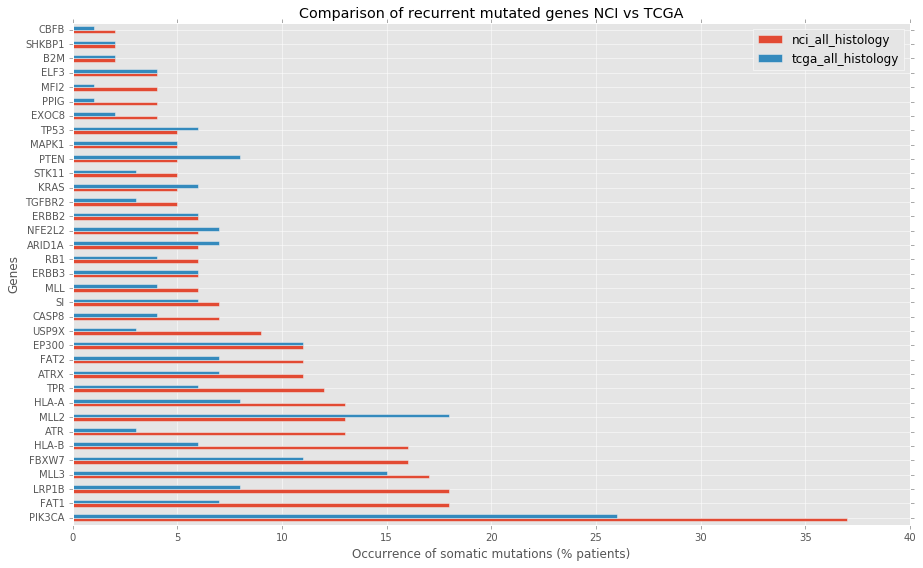

In [156]:
# pandas bar plot use index as x or y axis
fig = plt.figure()

ax=df.plot(kind='barh', )
ax.set_xlabel('Occurrence of somatic mutations (% patients)')
ax.set_ylabel('Genes')
ax.set_title('Comparison of recurrent mutated genes NCI vs TCGA')
plt.savefig("comparison_mutated_genes_nci_vs_tcga.png", bbox_inches='tight')
# plt.set_xlabel(genes)

In [58]:
# reshape and pivot data
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/82_patients/high_moderate_SNV_summary_with_normal_82_patients.filtered.somatic.txt.comut', sep='\t')
df.head()

,clinic_or_genes,patient,clinic_or_mutations
0,Histology,HTMCP-03-06-02007,Adeno
1,Histology,HTMCP-03-06-02026,Adeno
2,Histology,HTMCP-03-06-02047,Adeno
3,Histology,HTMCP-03-06-02074,Adeno
4,Histology,HTMCP-03-06-02075,Adeno


In [29]:
# df['idx'] = df.groupby('patient').cumcount()
# df.head(50)

In [40]:
# pf[['Histology','HIV']]

In [68]:
# index is the row; columns is the column idx; values is the value
# reshape the data from long form to wide form
# method include: pivot, pivot_table, stack, unstack
pf = df.pivot(index='patient', columns='clinic_or_genes', values='clinic_or_mutations')
pf.drop(['Histology', 'HIV'], axis=1, inplace=True)
# np.where(pd.isnull(pf))

In [72]:
# see how many nas in a row
pf.T.isnull().sum().sort_values().to_csv('aa.tmp')
# len(pf.columns)

In [73]:
# if patients with no mutation are more likely to have integration
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[63, 11], [7, 1]])
print(pvalue)

1.0


In [56]:
for patient in pf.index:
    print patient, unique(pf.ix[patient])

HTMCP-03-06-02001

NameError: name 'unique' is not defined

In [ ]:
# print(np.random.randint(13), "x", np.random.randint(13))
#!/usr/bin/python
for test in range(50):
    a = np.random.randint(13)
    b = np.random.randint(13)
#     print("%s x %s" % (a, b))
    print(test)

In [ ]:
for test in range(50):
    print(test)

In [ ]:
# print ("%s" % int(answer));
# answer = raw_input('Enter your answer:')

In [19]:
from collections import OrderedDict
from pandas import DataFrame
import pandas as pd
import numpy as np

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = DataFrame(table)

In [22]:
p = d.pivot(index='Item', columns='CType', values='USD')

In [23]:
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,None
Item1,None,3$,4$


In [387]:
# makes boxplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20fc7f9490>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f20fc77c210>], dtype=object)

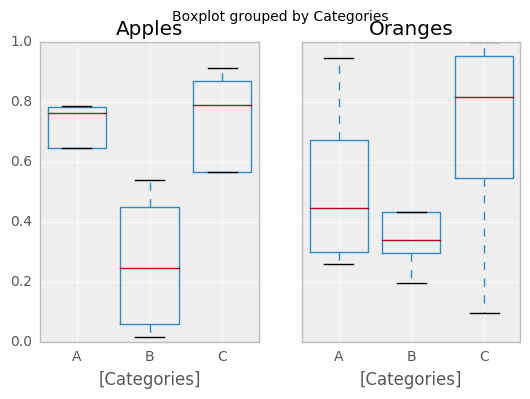

In [403]:
import pandas as pd

df = pd.DataFrame(np.random.rand(12,2), columns=['Apples', 'Oranges'] )

df['Categories'] = pd.Series(list('AAAABBBBCCCC'))

# pd.options.display.mpl_style = 'default'
matplotlib.pyplot.style.use 

df.boxplot(by='Categories', showfliers=False, widths=(0.8,0.8,0.8))
